## Objective: Use different models to predict if a person is benign or malignant for breast cancer

#### Import modules and split the data

In [53]:
# Import sklearn modules.
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.decomposition import PCA
from scipy.special import expit

# Import other modules.
import pandas as pd
from IPython.display import display
from time import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
%matplotlib inline

dataset = pd.read_csv('data.csv')

# Splitting csv file into data and target variables.
data = dataset.loc[:, 'radius_mean':'fractal_dimension_worst']
target = pd.get_dummies(dataset.loc[:, 'diagnosis']).loc[:, 'B']

data = data.to_numpy()
target = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(np.bincount(y_train))
print(np.bincount(y_test))


(426, 30)
(426,)
(143, 30)
(143,)
[159 267]
[53 90]


#### Visualize the data with TSNE

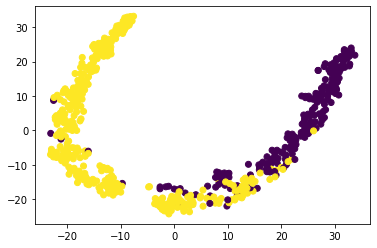

In [54]:
tsne = TSNE(random_state=42)

data_trans = tsne.fit_transform(data)

plt.scatter(data_trans[:, 0], data_trans[:, 1], c=target)


#### Use Perceptron to check if data is linear

In [55]:
lr_clf = Perceptron(n_jobs=-1, random_state=42)
start_time = time()

lr_clf.fit(X_train, y_train)

print('\n\t---------- Training Results ----------- ')
print(f'\tTrain Score -> {lr_clf.score(X_train, y_train)* 100:.2f}%')
print(f'\tTest Score -> {lr_clf.score(X_test, y_test) * 100:.2f}%')
print(f'\tElapsed -> {(time() - start_time)/60:.2f} minutes')


	---------- Training Results ----------- 
	Train Score -> 92.02%
	Test Score -> 92.31%
	Elapsed -> 0.00 minutes


#### Use more advanced linear model

In [56]:
# Create logistic regression model.
logreg = LogisticRegression(
    solver='liblinear',
    C=1000, n_jobs=-1,
    class_weight='balanced',
    random_state=42
    )

# NOTE: liblinear is the best optimization algirhtm for small datasets.

logreg.fit(X_train, y_train)

print('\n\t---------- Training Results ----------- ')
print(f'\tTrain Score -> {logreg.score(X_train, y_train)* 100:.2f}%')
print(f'\tTest Score -> {logreg.score(X_test, y_test) * 100:.2f}%')
print(f'\tElapsed -> {(time() - start_time)/60:.2f} minutes')


	---------- Training Results ----------- 
	Train Score -> 96.48%
	Test Score -> 95.80%
	Elapsed -> 0.00 minutes


#### Add recall score and confusion matrix

In [57]:
pred = logreg.predict(X_test)

# confusion matrix function.
def confusion_matrix(target, predictions):
    matrix = []
    for column_label in np.unique(target):
        column = []
        pred_label = predictions[np.where(target == column_label)]
        
        for label in np.unique(target):
            column.append(sum(pred_label == label))
        
        matrix.append(column)
    
    return np.array(matrix).T

matrix = confusion_matrix(y_test, pred)

print(f'confusion matrix: \n{matrix}')

# create recall function.
def recall(confusion_matrix):
    matrix = confusion_matrix    # Get underlying array.
    true_pos = matrix[0][0]
    false_neg = matrix[1][0]
    return true_pos / (true_pos + false_neg)

print(f'Recall score: {recall(matrix)*100:.2f}%')

confusion matrix: 
[[49  2]
 [ 4 88]]
Recall score: 92.45%


#### Plot the results of the new model

0.9244288224956063


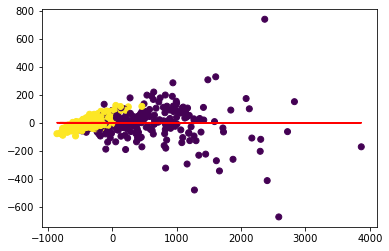

In [58]:
pca = PCA(n_components=2)

data_2d = pca.fit_transform(data)

logreg.fit(data_2d, target)

m = logreg.coef_
b = logreg.intercept_
loss = expit(data_2d * m + b)

plt.scatter(data_2d[:, 0], data_2d[:, 1], c=target, label=target)
plt.plot(data_2d, loss, color='red')

print(logreg.score(data_2d, target))
